## Insurance prediction 
**AIM**: To predict if the user will get the insurance claim or not

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt

# class to load data
from load_data import DataCreate

# class to plot the data
from dataplot import DataPlot

# class to create pipelines, data and ml pipeline
from pipelines import pipe_line

# class to create ID features
from idfeats import IDFeatures

# class containing utility function
from utilitfn import UtilityFn

# tune model gb and rf
from tunemodel import ParamTune

# class to create new features
from featEng_1 import FeatureEngineering

## Data
1. Loading training and testing data
1. Data object has methods and properties containing the training and testing data


In [2]:
## Create the data object
data1 = DataCreate()

## call the load data function
data1.load_data()



####  Features and Labels
1. The quantity we want to predict is the OUTCOME.
1. Rest of the columns are features.

In [3]:
## label of the data
label = 'OUTCOME'

data1.labelandFeatures(label)
display(data1.train.head())


,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,0.0,37379,11000.0,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,1.0,10238,12000.0,0,0,0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,1.0,92099,6000.0,1,0,0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,1.0,32122,15000.0,0,0,1,0.0,Sedan


### Checking Datatype of features 
1. **info** utility from pandas gives an information about the datatype of the features


In [4]:
data1.train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   105000 non-null  int64  
 1   AGE                  105000 non-null  object 
 2   GENDER               105000 non-null  object 
 3   DRIVING_EXPERIENCE   105000 non-null  object 
 4   EDUCATION            105000 non-null  object 
 5   INCOME               105000 non-null  object 
 6   CREDIT_SCORE         105000 non-null  float64
 7   VEHICLE_OWNERSHIP    105000 non-null  float64
 8   VEHICLE_YEAR         105000 non-null  object 
 9   MARRIED              105000 non-null  float64
 10  CHILDREN             105000 non-null  float64
 11  POSTAL_CODE          105000 non-null  int64  
 12  ANNUAL_MILEAGE       105000 non-null  float64
 13  SPEEDING_VIOLATIONS  105000 non-null  int64  
 14  DUIS                 105000 non-null  int64  
 15  PAST_ACCIDENTS   

## OBJECT datatype
1. We start by investigating features of the **Object**  data type for both the training and test data
1. The number of categories in these features are less so one can use one-hot encoding during preprocessing.

#### AGE 
1. The column actually represents the age group.
1. There are only four categories.
1. One needs to perform some sort of encoding to deal with this feature.
    1. We can use one-hot encoding to do so.

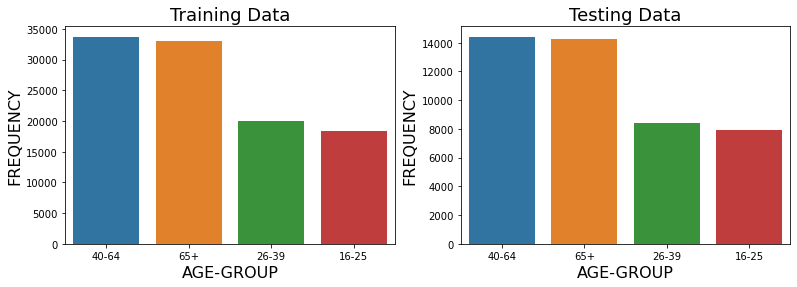

In [5]:
DataPlot.freqPlot(data1,'AGE','AGE-GROUP')

#### GENDER 
1. Gender is a categorical features and needs one-hot encoding as well.

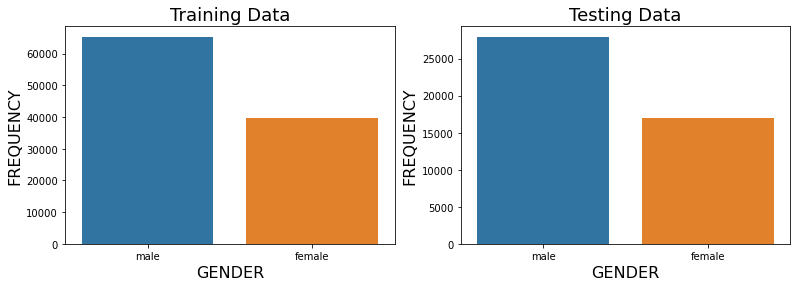

In [6]:
DataPlot.freqPlot(data1,'GENDER','GENDER')

#### DRIVING_EXPERIENCE

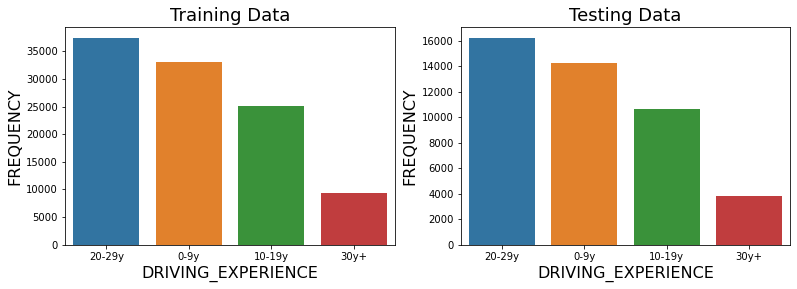

In [8]:
DataPlot.freqPlot(data1,'DRIVING_EXPERIENCE','DRIVING_EXPERIENCE')

#### EDUCATION


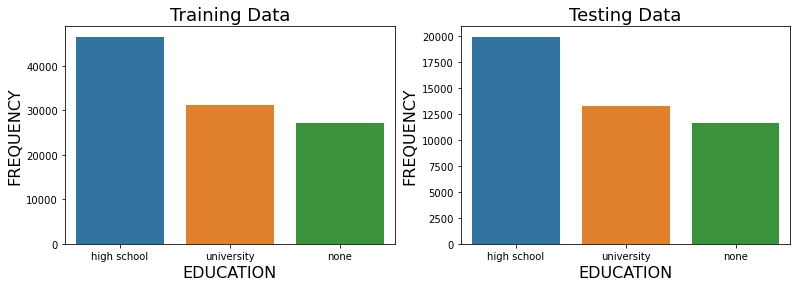

In [9]:
DataPlot.freqPlot(data1,'EDUCATION','EDUCATION')

#### INCOME

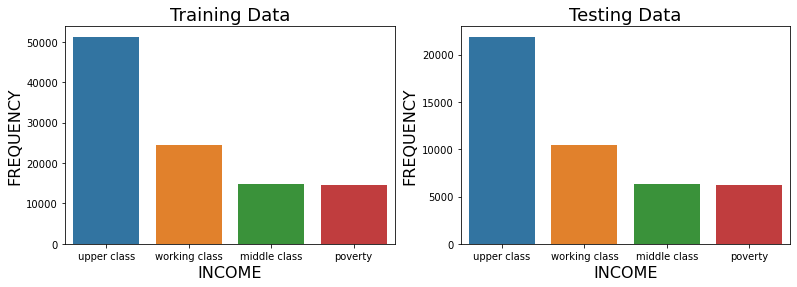

In [10]:
DataPlot.freqPlot(data1,'INCOME','INCOME')

#### VEHICLE_YEAR

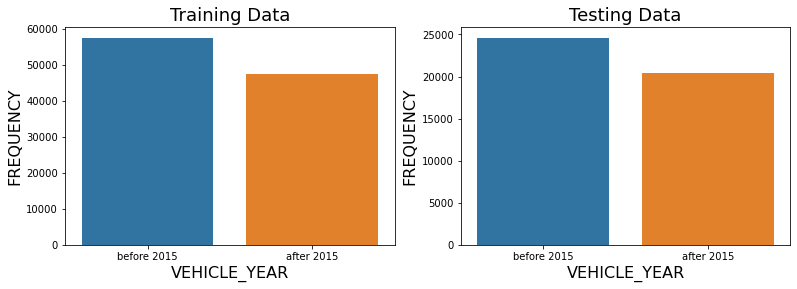

In [11]:
DataPlot.freqPlot(data1,'VEHICLE_YEAR','VEHICLE_YEAR')

#### TYPE_OF_VEHICLE

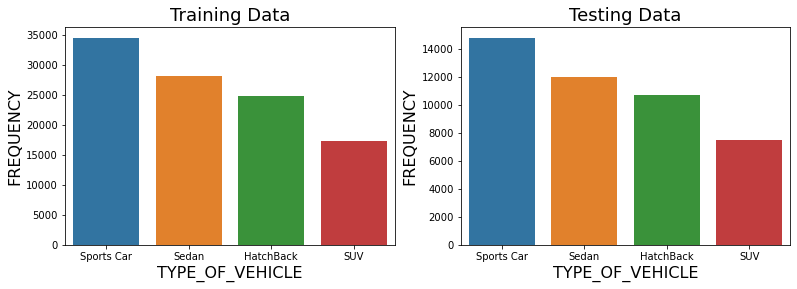

In [12]:
DataPlot.freqPlot(data1,'TYPE_OF_VEHICLE','TYPE_OF_VEHICLE')

## FLOAT64
Plotting the histogram of the numerical features. 

#### CREDIT_SCORE


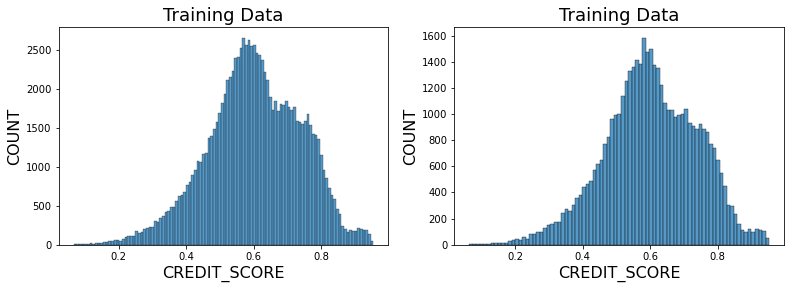

In [13]:
DataPlot.histPlot(data1, 'CREDIT_SCORE', 'CREDIT_SCORE')

#### VEHICLE_OWNERSHIP
* This features has only two value 0/1 and better to convert it into a categorical features

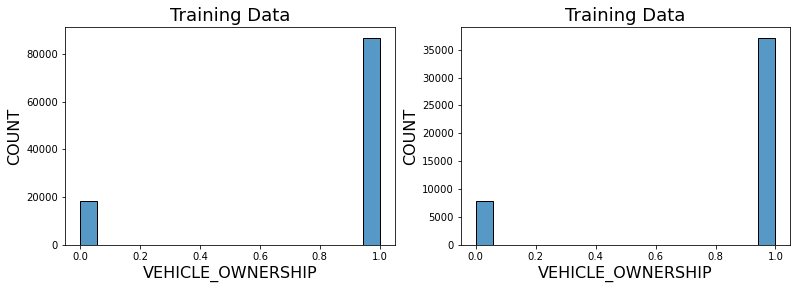

In [14]:
DataPlot.histPlot(data1,'VEHICLE_OWNERSHIP','VEHICLE_OWNERSHIP')

#### MARRIED 
* Only two features indicate either the person is married or not.
* We can convert this feature also into a categorical feature

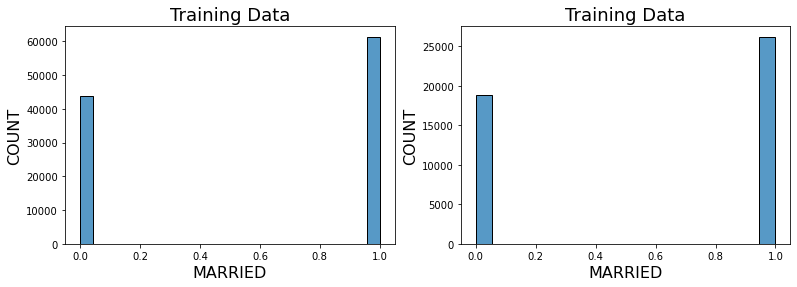

In [15]:
DataPlot.histPlot(data1,'MARRIED','MARRIED')

#### CHILDERN
* Only two possible value either the person has a children or not 
* We can also convert this column into categorical column and use one hot encoding

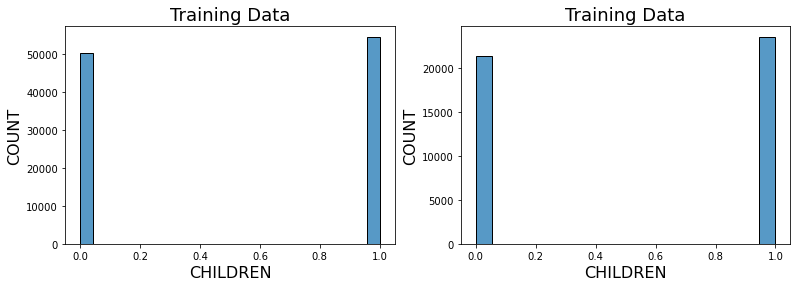

In [16]:
DataPlot.histPlot(data1,'CHILDREN','CHILDREN')

#### ANNUAL_MILEAGE
* Annual mileage column has large range of values so it's not visible.
* It can be due to units being in km.
* One can express mileage in terms of 1000 kms.
* Only discrete values of **ANNUAL_MILEAGE** is available 
* This column can also be converted into a categorical column but using label encoding

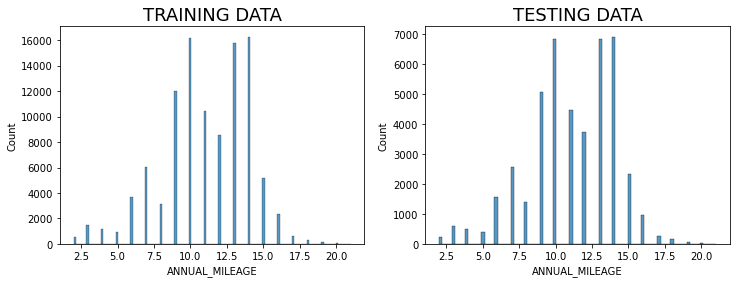

In [17]:
mileage_train = data1.train.ANNUAL_MILEAGE.apply(lambda x: x/1000)
mileage_test = data1.test.ANNUAL_MILEAGE.apply(lambda x: x/1000)
f,ax=plt.subplots(1,2,figsize=(12,4))
g=sns.histplot(mileage_train,ax=ax[0])
g.set_title('TRAINING DATA',fontsize=18)
g1=sns.histplot(mileage_test,ax=ax[1])
g1.set_title('TESTING DATA', fontsize=18)
plt.show()

## INT64


####  POSTAL_CODE AND ID
* They are categorical variable.
* Due to large number of unique values need to be treated carefully.

##### POSTAL CODE
* One needs to also use the POSTAL_CODE feature.
* However, using it might be tricky due to large number of categories.
* Looking at only top 20 categories.
* Few categories have really large value so it might be good idea to use log on the y scale of the bar plot.
* We can see that only few categories have large values and rest of them are simiar so we can use only top n values for encoding purposes.


Number of unique postal codes: 10937


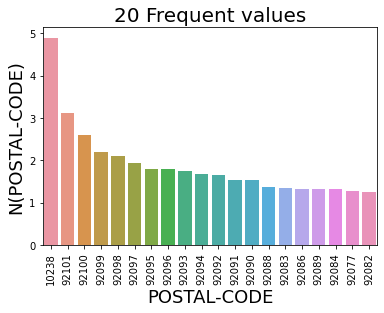

In [19]:
nvals = data1.train.POSTAL_CODE.nunique()
print(f'Number of unique postal codes: {nvals}')
DataPlot.plotIDs(data1,20,'POSTAL_CODE','POSTAL-CODE','N(POSTAL-CODE)')

### ID
* User ID is similar to the POSTAL_CODE
* I use only top 20 rest of the ID's are put in the same category.

Number of unique postal codes:  98485


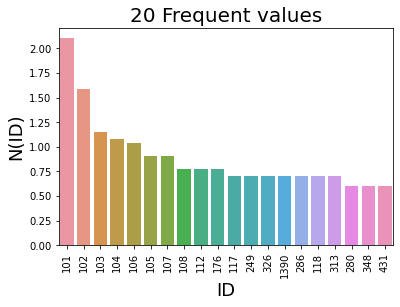

In [21]:
nvals = data1.train.ID.nunique()
print(f'Number of unique postal codes:  {nvals}')
DataPlot.plotIDs(data1, 20, 'ID', 'ID', 'N(ID)')


#### SPEEDING_VIOLATIONS
* The number of speeding violations are integer. 
* They can be set to ordinal varible

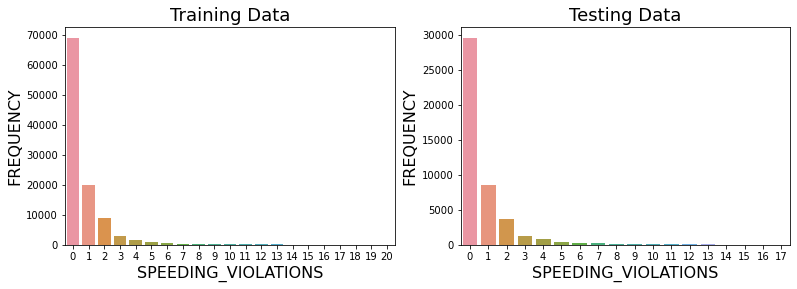

In [22]:
DataPlot.freqPlot(data1,'SPEEDING_VIOLATIONS','SPEEDING_VIOLATIONS')

#### DUIS

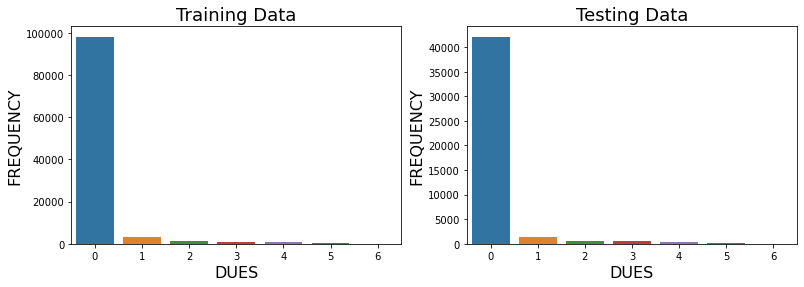

In [23]:
DataPlot.freqPlot(data1,'DUIS','DUES')

#### PAST_ACCIDENTS

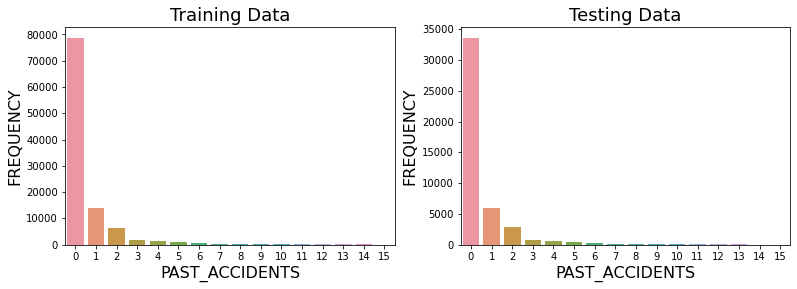

In [24]:
DataPlot.freqPlot(data1,'PAST_ACCIDENTS','PAST_ACCIDENTS')

### Exploratory analysis
We perform following steps in our exploratory analysis.

1. Setting correct datatype for each features.
1. Finding invalid values.
1. Coming up with a strategy to impute incorrect values.



#### Feature datatype conversion
* **Categorical variables**: Are discrete, no order/preference in the value.
    1. ID
    1. GENDER
    1. VEHICLE_OWNERSHIP
    1. MARRIED
    1. CHILDREN
    1. POSTAL_CODE
    1. TYPE_OF_VEHICLE
    1. AGE
    1. DRIVING EXPERIENCE
    1. EDUCATION
    1. INCOME
    1. VEHICLE_YEAR
    1. ANNUAL_MILEAGE
    1. SPEEDING_VIOLATIONS
    1. DUIS
    1. PAST_ACCIDENTS
* **Numeric features**: 
    1. CREDIT_SCORE

#### Creating POSTAL_ID features

# BASE MODEL
* Importing important libraries and modules.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import optuna
from itertools import product
from sklearn import set_config
set_config(display='diagram')

### Data prep
* Function that combines all the data loading, manipulation steps in itself.

In [8]:
def dataPrep_ordinal(features_ignore=['ID','POSTAL_CODE']):
    '''
    This function will give us the data that is preprocessed using ordinal encoding. 
    ### Parameters: 
        None
    ### Return: 
        df1(dataframe) : training data
        df2(dataframe): testing data
    '''

    obj = DataCreate()
    obj.load_data()  # load the data

    label = 'OUTCOME'
    
    obj.convertDatatype()
    ## convert ID features into a categorical feature
    #IDFeatures.ID_features(obj.train,obj.test,20)

    ## convert POSTAL_CODE features into a categorical feature
    #obj=IDFeatures.postal_code_features(obj,20)

    obj.train['POSTAL_CODE'] = obj.train.POSTAL_CODE.astype('str')
    obj.test['POSTAL_CODE'] = obj.test.POSTAL_CODE.astype('str')
    
    codes = list(obj.train.POSTAL_CODE.value_counts().nlargest(20).index)
    ids = obj.train.POSTAL_CODE.isin(codes)
    obj.train.loc[ids,'NEW_POSTAL_CODE']  = obj.train.loc[ids,'POSTAL_CODE']
    obj.train.loc[ids==False,'NEW_POSTAL_CODE'] = 'unknown'


    ids = obj.test.POSTAL_CODE.isin(codes)
    obj.test.loc[ids, 'NEW_POSTAL_CODE'] = obj.test.loc[ids, 'POSTAL_CODE']
    obj.test.loc[ids == False, 'NEW_POSTAL_CODE'] = 'unknown'

    ## obtain labels and features
    obj.labelandFeatures(label)

    ## categorical column
    cat_col = obj.train[obj.features].select_dtypes(include='object').columns
    
    ## numerical column
    num_col = obj.train[obj.features].select_dtypes(
        exclude='object').columns

    cat_col = cat_col.drop(features_ignore)
    obj.cat_col = list(cat_col)
    obj.num_col = list(num_col)

    pipe_line.data_pipeline_ord(obj)
    features_1 = list()
    features_1.extend(obj.cat_col)
    features_1.extend(obj.num_col)

    ## features included 
    obj.features_included = features_1

    ## create train/test split data
    UtilityFn.split_data(obj)
    
    return obj


def dataPrep_ohot(features_ignore=['ID', 'POSTAL_CODE']):
    '''
    This function will give us the data that is preprocessed for the use. 
    ### Parameters: 
        None
    ### Return: 
        df1(dataframe) : training data
        df2(dataframe): testing data
    '''

    obj = DataCreate()
    obj.load_data()  # load the data

    label = 'OUTCOME'

    ## convert POSTAL_CODE features into a categorical feature
    #obj = IDFeatures.postal_code_features(obj,20)


    ## convert datatype of the features
    obj.convertDatatype()


    obj.train['POSTAL_CODE'] = obj.train.POSTAL_CODE.astype('str')
    obj.test['POSTAL_CODE'] = obj.test.POSTAL_CODE.astype('str')


    codes = list(obj.train.POSTAL_CODE.value_counts().nlargest(20).index)
    ids = obj.train.POSTAL_CODE.isin(codes)
    obj.train.loc[ids, 'NEW_POSTAL_CODE'] = obj.train.loc[ids, 'POSTAL_CODE']
    obj.train.loc[ids == False, 'NEW_POSTAL_CODE'] = 'unknown'

    ids = obj.test.POSTAL_CODE.isin(codes)
    obj.test.loc[ids, 'NEW_POSTAL_CODE'] = obj.test.loc[ids, 'POSTAL_CODE']
    obj.test.loc[ids == False, 'NEW_POSTAL_CODE'] = 'unknown'

    
    ## obtain feature and label names
    obj.labelandFeatures(label)
    
    cat_col = obj.train[obj.features].select_dtypes(include='object').columns

    num_col = obj.train[obj.features].select_dtypes(
        exclude='object').columns

    cat_col = cat_col.drop(features_ignore)
    obj.cat_col = list(cat_col)
    obj.num_col = list(num_col)


    pipe_line.data_pipeline_ohot(obj)

    features_1 = list()
    features_1.extend(obj.cat_col)
    features_1.extend(obj.num_col)

    ## features included
    obj.features_included = features_1
    ## create train/test split data
    UtilityFn.split_data(obj)

    return obj




## Data Preparation
* Calling function dataPrep.
    1. It will load the training and test data.
    1. It will create ID and POSTAL ID features.
    1. Set the features and labels from the dataset.
    1. Ignore features not required


In [9]:
data_ord = dataPrep_ordinal()

data_ord.data_pipe


ColumnTransformer(transformers=[('ord_col',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('transform',
                                                  OrdinalEncoder())]),
                                 ['AGE', 'GENDER', 'DRIVING_EXPERIENCE',
                                  'EDUCATION', 'INCOME', 'VEHICLE_OWNERSHIP',
                                  'VEHICLE_YEAR', 'MARRIED', 'CHILDREN',
                                  'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
                                  'DUIS', 'PAST_ACCIDENTS', 'TYPE_OF_VEHICLE',
                                  'NEW_POSTAL_CODE']),
                                ('num_col',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('transform',
                                                  StandardScaler())]),
                                 ['CREDIT_SCORE'])])

In [10]:
data_oh  = dataPrep_ohot()
data_oh.data_pipe

ColumnTransformer(transformers=[('oh_col',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('transform',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['AGE', 'GENDER', 'DRIVING_EXPERIENCE',
                                  'EDUCATION', 'INCOME', 'VEHICLE_OWNERSHIP',
                                  'VEHICLE_YEAR', 'MARRIED', 'CHILDREN',
                                  'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
                                  'DUIS', 'PAST_ACCIDENTS', 'TYPE_OF_VEHICLE',
                                  'NEW_POSTAL_CODE']),
                                ('num_col',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('transform',
                                                  StandardScaler())]),
                                 ['CREDIT_SCORE'])])

## Model Fitting and Hyper parameter optmization
* First a hyper-parameter tuning is performed on the data.
* Optimized model is used to create a model that is trained on the full data set. 
* The new model is used to make predictions on the test data.

In [11]:
def randomForest(param, obj: object, filename: str):
    '''
    This function will fit a  random forest with optimized hyperparameters
    ### Parameters:
        param(dict): dictionary containing the data
        obj(object): instance of the data class
        filename(str): file name that wants to store the data
    ### Return:
        None
    '''

    clf_rf = RandomForestClassifier(max_depth=param['max_depth'], n_estimators=param['n_estimators'],
                                    min_samples_split=param['min_samples_split'],
                                    min_samples_leaf=param['min_samples_leaf'], random_state=42)
    UtilityFn.create_full_pipe(obj, clf_rf, filename)
    return clf_rf


def boostingGrad(param: dict, obj: object, filename: str):
    '''
    This function will fit a  random forest with optimized hyperparameters
    ### Parameters:
        param(dict): dictionary containing the data
        obj(object): instance of the data class
        filename(str): file name that wants to store the data
    ### Return:
        None
    '''
    clf_gb = GradientBoostingClassifier(
        max_depth=param['max_depth'], n_estimators=param['n_estimators'],
        # min_samples_leaf=param_dict_gb['min_samples_leaf'],
        learning_rate=param['learning_rate'],
        min_samples_split=param['min_samples_split'],
        random_state=42)

    UtilityFn.create_full_pipe(obj, clf_gb, filename)
    return clf_gb

### function to plot feature importance 
def feature_importance(obj: object, x: str, y: str, clfname: str):
    '''
    This function will plot the feature importance given the object
    ### Parameter:
        obj(object): instance of the data class
        x(str): x-axis 
        y(str): y-axis 
        clfname(str): name of the classifier
    ### Return:  
        feat_imp(dataframe): dataframe containing the feature importance
    '''

    clf = obj.ml_pipe[1]
    feat_imp = pd.DataFrame(
        {'feature': obj.features_included, 'importance': clf.feature_importances_})
    feat_imp = feat_imp.sort_values(by='importance')
    g = feat_imp.plot(kind='barh', x=x, y=y, figsize=(7, 5))
    g.set_title(f'Feature importance for a {clfname}', fontsize=20)
    g.set_xlabel('Feature Importance', fontsize=18)
    g.set_ylabel('Feature name', fontsize=18)
    plt.show()
    return feat_imp

## Gradient Boosting
#### Ordinal Encoding
* Implementing a gradient boosting classifier and performing hyperparameter tuning using optuna.
 

In [38]:
param_dict = ParamTune.tune_params_gb(data_ord, 100)
clf_gb = boostingGrad(param_dict,data_ord,'gb_ord')


[I 2022-11-05 11:15:07,949] A new study created in memory with name: no-name-1d132a02-5b5d-4172-ac79-79bd43432796
[I 2022-11-05 11:15:16,138] Trial 0 finished with value: 0.6810815603839596 and parameters: {'max_depth': 24, 'n_estimators': 114, 'learning_rate': 0.015456387364159122, 'min_samples_split': 0.4821726399863172}. Best is trial 0 with value: 0.6810815603839596.
[I 2022-11-05 11:15:25,366] Trial 1 finished with value: 0.6811681862646124 and parameters: {'max_depth': 13, 'n_estimators': 135, 'learning_rate': 0.053348601824266234, 'min_samples_split': 0.787517348738344}. Best is trial 0 with value: 0.6810815603839596.
[I 2022-11-05 11:15:33,619] Trial 2 finished with value: 0.6811317770032667 and parameters: {'max_depth': 11, 'n_estimators': 105, 'learning_rate': 0.04465771981481291, 'min_samples_split': 0.6474529353576587}. Best is trial 0 with value: 0.6810815603839596.
[I 2022-11-05 11:15:46,731] Trial 3 finished with value: 0.6812573334564483 and parameters: {'max_depth': 18

Log-loss for the training data: 0.6804885360478894
Log-loss for the validation data: 0.6805198483518474


ValueError: Found unknown categories [92077, 92083, 92084, 92085, 92086, 92088, 92089, 92090, 92091, 92092, 92093, 92094, 92095, 92096, 92097, 92098, 92099, 92100, 92101, 10238] in column 14 during transform

#### Feature importance
Feature importance for the **Gradient Boosting classifier**

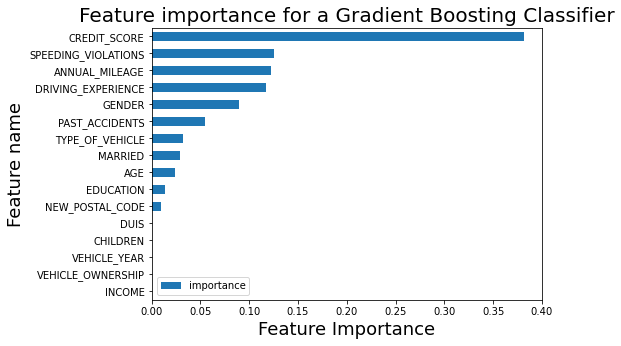

In [39]:
clfname = 'Gradient Boosting Classifier'
feat_imp_gb=feature_importance(data_ord, 'feature', 'importance', clfname)


## Random Forest Classifier
### Using ordinal encoding

In [12]:
param_dict_feats_rf = ParamTune.tune_params_rf(data_ord, 100)
#clf_rf = randomForest(param_dict_feats_rf, data_ord, 'rf_ord')

[I 2022-11-05 13:59:42,391] A new study created in memory with name: no-name-bcf5062c-0b2b-4ef6-b756-de8fe671b2f4
[I 2022-11-05 13:59:51,547] Trial 0 finished with value: 0.682556027831736 and parameters: {'max_depth': 22, 'n_estimators': 140, 'min_samples_split': 13, 'min_samples_leaf': 12, 'criterion': 'entropy'}. Best is trial 0 with value: 0.682556027831736.
[I 2022-11-05 13:59:59,744] Trial 1 finished with value: 0.6820049365292908 and parameters: {'max_depth': 23, 'n_estimators': 137, 'min_samples_split': 20, 'min_samples_leaf': 17, 'criterion': 'gini'}. Best is trial 1 with value: 0.6820049365292908.
[I 2022-11-05 14:00:04,669] Trial 2 finished with value: 0.6828390340525772 and parameters: {'max_depth': 24, 'n_estimators': 73, 'min_samples_split': 14, 'min_samples_leaf': 16, 'criterion': 'entropy'}. Best is trial 1 with value: 0.6820049365292908.
[I 2022-11-05 14:00:08,535] Trial 3 finished with value: 0.6822469121730845 and parameters: {'max_depth': 23, 'n_estimators': 61, 'mi

In [13]:
param_dict_feats_rf

{'max_depth': 16,
 'n_estimators': 144,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'criterion': 'gini'}

#### Feature Importance 
One can plot the feature importance for the random forest classifier

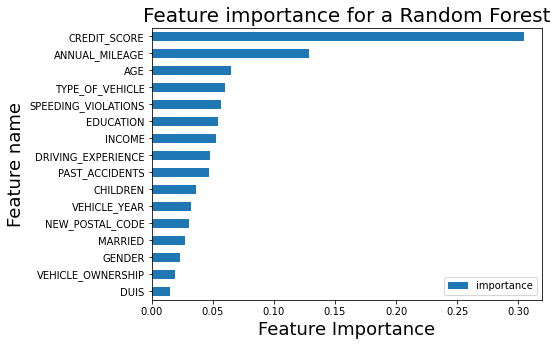

In [14]:
clfname = 'Random Forest'
feat_imp=feature_importance(data_ord, 'feature', 'importance', clfname)



In [15]:
feat_imp

,feature,importance
11,DUIS,0.014887
5,VEHICLE_OWNERSHIP,0.018888
1,GENDER,0.023590
7,MARRIED,0.027503
14,NEW_POSTAL_CODE,0.030526
6,VEHICLE_YEAR,0.032093
8,CHILDREN,0.036393
12,PAST_ACCIDENTS,0.047009
2,DRIVING_EXPERIENCE,0.047694
4,INCOME,0.052473


In [16]:
feature_ignore=['VEHICLE_OWNERSHIP','MARRIED','GENDER','DUIS','ID','POSTAL_CODE']
data_oh = dataPrep_ohot(feature_ignore)
data_oh.data_pipe


ColumnTransformer(transformers=[('oh_col',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('transform',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION',
                                  'INCOME', 'VEHICLE_YEAR', 'CHILDREN',
                                  'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
                                  'PAST_ACCIDENTS', 'TYPE_OF_VEHICLE',
                                  'NEW_POSTAL_CODE']),
                                ('num_col',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('transform',
                                                  StandardScaler())]),
                                 ['CREDIT_SCORE'])])

In [17]:
param_dict_rf = ParamTune.tune_params_rf(data_oh, 200)
clf_rf = randomForest(param_dict_feats_rf, data_oh, 'oh_rf')


[I 2022-11-05 14:12:42,439] A new study created in memory with name: no-name-315d9e61-4259-4821-906b-7c308bfafda0
[I 2022-11-05 14:12:54,941] Trial 0 finished with value: 0.6811594816984408 and parameters: {'max_depth': 25, 'n_estimators': 119, 'min_samples_split': 10, 'min_samples_leaf': 15, 'criterion': 'entropy'}. Best is trial 0 with value: 0.6811594816984408.
[I 2022-11-05 14:13:06,701] Trial 1 finished with value: 0.6816074413592905 and parameters: {'max_depth': 25, 'n_estimators': 103, 'min_samples_split': 18, 'min_samples_leaf': 11, 'criterion': 'entropy'}. Best is trial 0 with value: 0.6811594816984408.
[I 2022-11-05 14:13:16,664] Trial 2 finished with value: 0.6813909126635022 and parameters: {'max_depth': 21, 'n_estimators': 108, 'min_samples_split': 11, 'min_samples_leaf': 17, 'criterion': 'entropy'}. Best is trial 0 with value: 0.6811594816984408.
[I 2022-11-05 14:13:22,640] Trial 3 finished with value: 0.6815790661535833 and parameters: {'max_depth': 24, 'n_estimators': 5

Log-loss for the training data: 0.6690555657121761
Log-loss for the validation data: 0.6688666849757007
----- Predictions Saved -------


### Stacking classifiers
* Stacking together hyper parameter optimized random forest and gradient classifier.


In [129]:
UtilityFn.stackedPred(clf_rf,clf_gb,data,'stacked_class')

Log-loss for the training data: 0.6809450613619705
Log-loss for the validation data: 0.6809776016840027
----- Predictions Saved -------


# Feature Engineering

1. Boolean features capturing if the person had more than n speeding violations or not.
1. Boolean features capturing if the person has more than n DUES.
1. Boolean features captuing if the person has n past accidents or not.


In [33]:
def createNewFeatures(obj: object):
    '''
    This feature will take the data object and create new features and 
    add them into the data frame
    ### Parameter: 
        obj (object): object containing the data
    ### Return: 
        obj(object): object containing new features 
    '''
   
    ## combining dues feature to create new features
    FeatureEngineering.convertDUIS(obj)

    ## combining SPEEDING_VIOLATIONs to create new features
    FeatureEngineering.convertSpeed(obj)

    ## combining PAST_ACCIDENTS to create new features
    FeatureEngineering.convertAccident(obj)

    ## combine MARRIED and CHILDREN features
    FeatureEngineering.marriedChild(obj)

    return obj 

def dataPrepNew(features_ignore=['ID','POSTAL_CODE']):
    '''

    ''' 
    ## Creat the object
    obj = DataCreate()

    obj.load_data()
    label = 'OUTCOME'
    
    ## chage the data type
    obj.convertDatatype()
    obj.train['POSTAL_CODE'] = obj.train.POSTAL_CODE.astype('str')
    obj.test['POSTAL_CODE'] = obj.test.POSTAL_CODE.astype('str')


    codes = list(obj.train.POSTAL_CODE.value_counts().nlargest(15).index)
    ids = obj.train.POSTAL_CODE.isin(codes)
    obj.train.loc[ids, 'NEW_POSTAL_CODE'] = obj.train.loc[ids, 'POSTAL_CODE']
    obj.train.loc[ids == False, 'NEW_POSTAL_CODE'] = 'unknown'

    ids = obj.test.POSTAL_CODE.isin(codes)
    obj.test.loc[ids, 'NEW_POSTAL_CODE'] = obj.test.loc[ids, 'POSTAL_CODE']
    obj.test.loc[ids == False, 'NEW_POSTAL_CODE'] = 'unknown'

    
    obj = createNewFeatures(obj)

    obj.labelandFeatures(label)
    
    cat_col = obj.train[obj.features].select_dtypes(include='object').columns

    num_col = obj.train[obj.features].select_dtypes(
        exclude='object').columns

    cat_col = cat_col.drop(features_ignore)
    obj.cat_col = list(cat_col)
    obj.num_col = list(num_col)

    pipe_line.data_pipeline_ord(obj)

    features_1 = list()
    features_1.extend(obj.cat_col)
    features_1.extend(obj.num_col)

    ## features included
    obj.features_included = features_1
    
    ## create train/test split data
    UtilityFn.split_data(obj)

    return obj



**Create new features based on existing features**

In [34]:
dataNF = dataPrepNew()
dataNF.data_pipe


ColumnTransformer(transformers=[('ord_col',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('transform',
                                                  OrdinalEncoder())]),
                                 ['AGE', 'GENDER', 'DRIVING_EXPERIENCE',
                                  'EDUCATION', 'INCOME', 'VEHICLE_OWNERSHIP',
                                  'VEHICLE_YEAR', 'MARRIED', 'CHILDREN',
                                  'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
                                  'DUIS', 'PAST_ACCIDENTS', 'TYPE_OF_VEHICLE',
                                  'NEW_POSTAL_CODE', 'DUIS_CAT',
                                  'SPEEDING_VIOLATIONS_CAT',
                                  'PAST_ACCIDENTS_CAT', 'MAR_CHILD']),
                                ('num_col',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('transform',
                                                  StandardScaler())]),
                                 ['CREDIT_SCORE'])])

In [38]:
param_dict_NF = ParamTune.tune_params_rf(dataNF, 200)
#clf_NF = randomForest(param_dict_feats_rf, dataNF, 'ord_trial_rf')


[I 2022-11-05 18:14:37,905] A new study created in memory with name: no-name-aac739a4-bb60-4cfe-a6cf-f52b78f463a6
[I 2022-11-05 18:14:42,420] Trial 0 finished with value: 0.6823155394610073 and parameters: {'max_depth': 20, 'n_estimators': 80, 'min_samples_split': 18, 'min_samples_leaf': 16, 'criterion': 'gini'}. Best is trial 0 with value: 0.6823155394610073.
[I 2022-11-05 18:14:45,385] Trial 1 finished with value: 0.6825854642948653 and parameters: {'max_depth': 17, 'n_estimators': 50, 'min_samples_split': 20, 'min_samples_leaf': 16, 'criterion': 'entropy'}. Best is trial 0 with value: 0.6823155394610073.
[I 2022-11-05 18:14:53,142] Trial 2 finished with value: 0.6826605591116847 and parameters: {'max_depth': 23, 'n_estimators': 134, 'min_samples_split': 10, 'min_samples_leaf': 13, 'criterion': 'entropy'}. Best is trial 0 with value: 0.6823155394610073.
[I 2022-11-05 18:14:59,145] Trial 3 finished with value: 0.6824559986283114 and parameters: {'max_depth': 23, 'n_estimators': 104, '

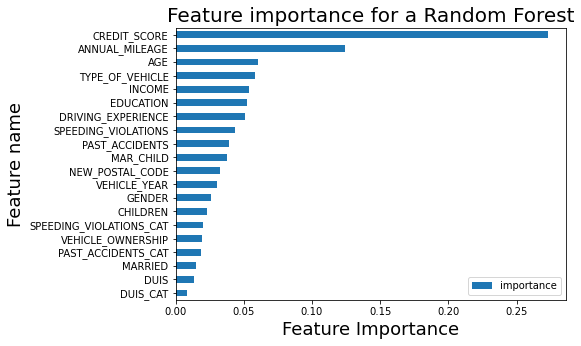

In [39]:
clfname = 'Random Forest'
feat_imp = feature_importance(dataNF, 'feature', 'importance', clfname)


In [43]:
feat_imp.head(8)

,feature,importance
15,DUIS_CAT,0.008027
11,DUIS,0.013656
7,MARRIED,0.015073
17,PAST_ACCIDENTS_CAT,0.018342
5,VEHICLE_OWNERSHIP,0.019478
16,SPEEDING_VIOLATIONS_CAT,0.020288
8,CHILDREN,0.023023
1,GENDER,0.026112


#### DUIS

In [ ]:
feature_ignore=['DUIS_CAT','DUIS','PAST_ACCIDENTS_CAT','SPEEDING_VIOLATIONS_CAT','VEHICLE_OWNERSHIP','MARRIED','GENDER','DUIS','ID','POSTAL_CODE']

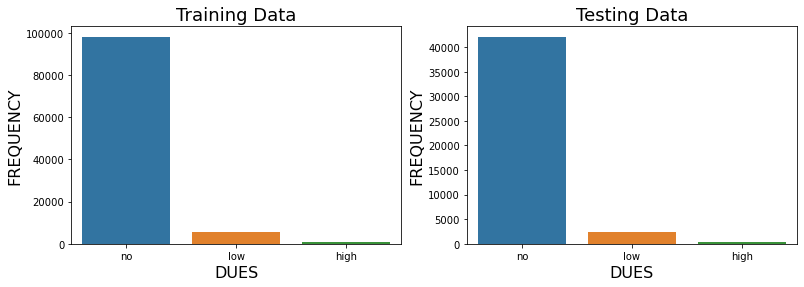

In [24]:
DataPlot.freqPlot(dataNF, 'DUIS_CAT', 'DUES')


#### SPEEDING_VIOLATIONS

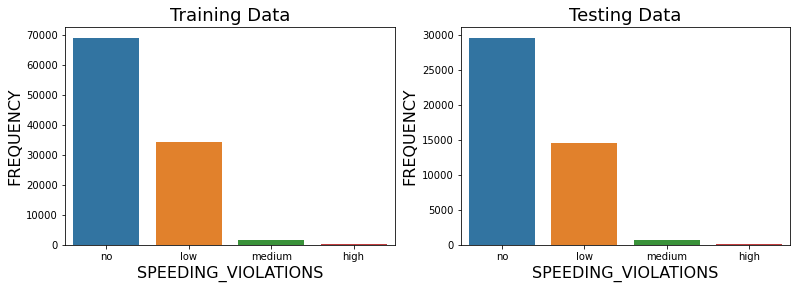

In [25]:
DataPlot.freqPlot(dataNF, 'SPEEDING_VIOLATIONS_CAT', 'SPEEDING_VIOLATIONS')


#### PAST_ACCIDENTS

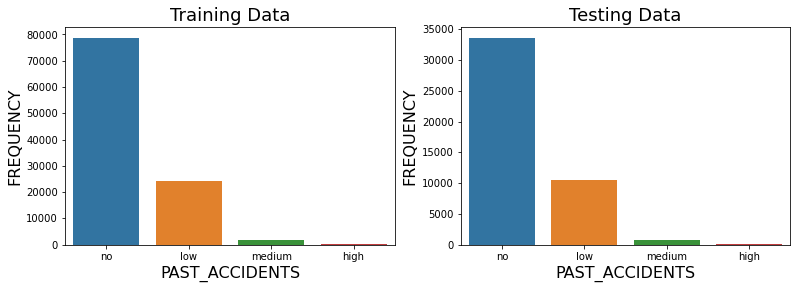

In [26]:
DataPlot.freqPlot(dataNF, 'PAST_ACCIDENTS_CAT', 'PAST_ACCIDENTS')


#### Married and Children features

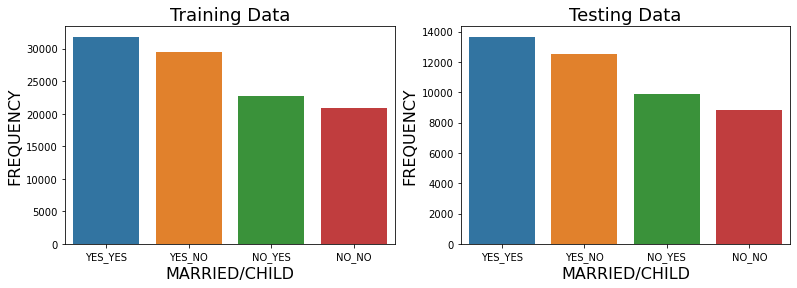

In [27]:
DataPlot.freqPlot(dataNF, 'MAR_CHILD', 'MARRIED/CHILD')


['AGE',
 'GENDER',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'VEHICLE_OWNERSHIP',
 'VEHICLE_YEAR',
 'MARRIED',
 'CHILDREN',
 'ANNUAL_MILEAGE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS',
 'TYPE_OF_VEHICLE',
 'NEW_POSTAL_CODE',
 'DUIS_CAT',
 'SPEEDING_VIOLATIONS_CAT',
 'PAST_ACCIDENTS_CAT',
 'MAR_CHILD',
 'CREDIT_SCORE']

### Feature Selection using mutual_information
We have created new features but now we will select only most relevant using feature selection.

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif


In [45]:
fs = SelectKBest(score_func=mutual_info_classif, k='all')
importance = fs.fit(dataNF.data_pipe.fit_transform(dataNF.X_train), dataNF.y_train)


In [47]:
df_i = pd.DataFrame({'name':dataNF.features_included,'score': importance.scores_})

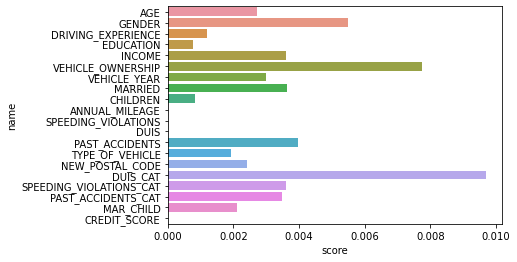

In [49]:
sns.barplot(y='name',x='score',data=df_i)
plt.show()


In [55]:
df_i.sort_values(by='score')

,name,score
9,ANNUAL_MILEAGE,0.000000
11,DUIS,0.000000
10,SPEEDING_VIOLATIONS,0.000000
19,CREDIT_SCORE,0.000000
3,EDUCATION,0.000789
8,CHILDREN,0.000837
2,DRIVING_EXPERIENCE,0.001202
13,TYPE_OF_VEHICLE,0.001920
18,MAR_CHILD,0.002100
14,NEW_POSTAL_CODE,0.002432


### Gradient Boosting


In [ ]:
param_dict_feats_gb = ParamTune.tune_params_gb(data_feats,30)
clf_gb = UtilityFn.boostingGrad(param_dict_feats_gb,data_feats,'trial_grd_boost')

### Random Forest

In [94]:
param_dict_feats_rf = ParamTune.tune_params_rf(data_feats,30)
clf_rf = UtilityFn.randomForest(param_dict, data_feats, 'trial_rf')


[I 2022-10-28 19:11:38,329] A new study created in memory with name: no-name-db8fd58a-0de3-4140-a020-04ede09eee88
[I 2022-10-28 19:11:41,784] Trial 0 finished with value: 0.6810819461962365 and parameters: {'max_depth': 7, 'n_estimators': 99, 'min_samples_split': 11, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.6810819461962365.
[I 2022-10-28 19:11:53,866] Trial 1 finished with value: 0.6815475433165584 and parameters: {'max_depth': 15, 'n_estimators': 124, 'min_samples_split': 15, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.6810819461962365.
[I 2022-10-28 19:11:59,712] Trial 2 finished with value: 0.6811177263380787 and parameters: {'max_depth': 10, 'n_estimators': 117, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.6810819461962365.
[I 2022-10-28 19:12:08,201] Trial 3 finished with value: 0.6812476411348874 and parameters: {'max_depth': 11, 'n_estimators': 147, 'min_samples_split': 8, 'min_samples_leaf': 7}. Best is trial 0 with val

In [199]:
svc = SVC()

svc.fit(data.data_pipe.fit_transform(data.X_train),data.y_train)

### Feature Selection


ValueError: A given column is not a column of the dataframe

## XG BOOST

In [184]:
import xgboost as xgb 

num_col = X_train.select_dtypes('float64').columns
cat_col = X_train.select_dtypes(exclude='float64').columns

data_pipe = data_pipeline(num_col, cat_col)
data_train = data_pipe.fit(X_train)
data_train = data_pipe.fit_transform(X_train)
data_test = data_pipe.transform(X_test)



dtrain = xgb.DMatrix(data_train,y_train,enable_categorical=True)
dtest = xgb.DMatrix(data_test,y_test)


param = {'max_depth': 5, 'eta': 1, 'objective': 'binary:logistic'}
num_round = 100

bst = xgb.train(param, dtrain, num_boost_round=num_round)
xgb.plot_importance(bst)


In [137]:
X_train

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE,BOOL_DUIS,BOOL_SPEEDING_VIOLATIONS,BOOL_PAST_ACCIDENTS,NEW_POSTAL_CODE,NEW_ID
52775,26-39,female,20-29y,university,upper class,0.708977,1.0,before 2015,0.0,0.0,13000.0,0,0,0,Sports Car,True,True,True,10238,unknown
20545,40-64,female,30y+,high school,upper class,0.445726,1.0,after 2015,0.0,1.0,8000.0,0,0,0,Sedan,True,True,True,10238,unknown
54925,65+,male,20-29y,none,upper class,0.712814,0.0,after 2015,1.0,1.0,14000.0,1,0,0,Sports Car,True,False,True,10238,unknown
82054,40-64,male,0-9y,none,upper class,0.507625,1.0,before 2015,1.0,0.0,9000.0,4,0,2,Sedan,True,False,False,unknown,unknown
4740,26-39,female,20-29y,high school,upper class,0.512486,1.0,before 2015,1.0,1.0,14000.0,0,0,0,HatchBack,True,True,True,10238,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103434,65+,male,0-9y,university,poverty,0.688937,1.0,after 2015,1.0,0.0,10000.0,1,0,0,SUV,True,False,True,10238,unknown
36354,16-25,male,30y+,high school,working class,0.621376,1.0,before 2015,1.0,1.0,12000.0,0,0,0,HatchBack,True,True,True,10238,unknown
71456,26-39,male,0-9y,university,working class,0.637635,1.0,before 2015,1.0,0.0,8000.0,0,0,0,Sports Car,True,True,True,10238,unknown
55990,65+,male,20-29y,university,middle class,0.473898,1.0,before 2015,0.0,0.0,12000.0,0,0,0,Sports Car,True,True,True,10238,unknown
